In [63]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier,plot_tree


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [64]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [65]:

data = pd.read_csv("penguinsFeatures.csv")


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [66]:

data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [67]:
# Covariance

print('Covariance:')
data.cov()

Covariance:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [68]:

# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missingValueInstances= missing_values_table(data)
missingValueInstances

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [69]:

#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
data.iloc[:,:] = imputer.fit_transform(data)

data.isnull().sum()




species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

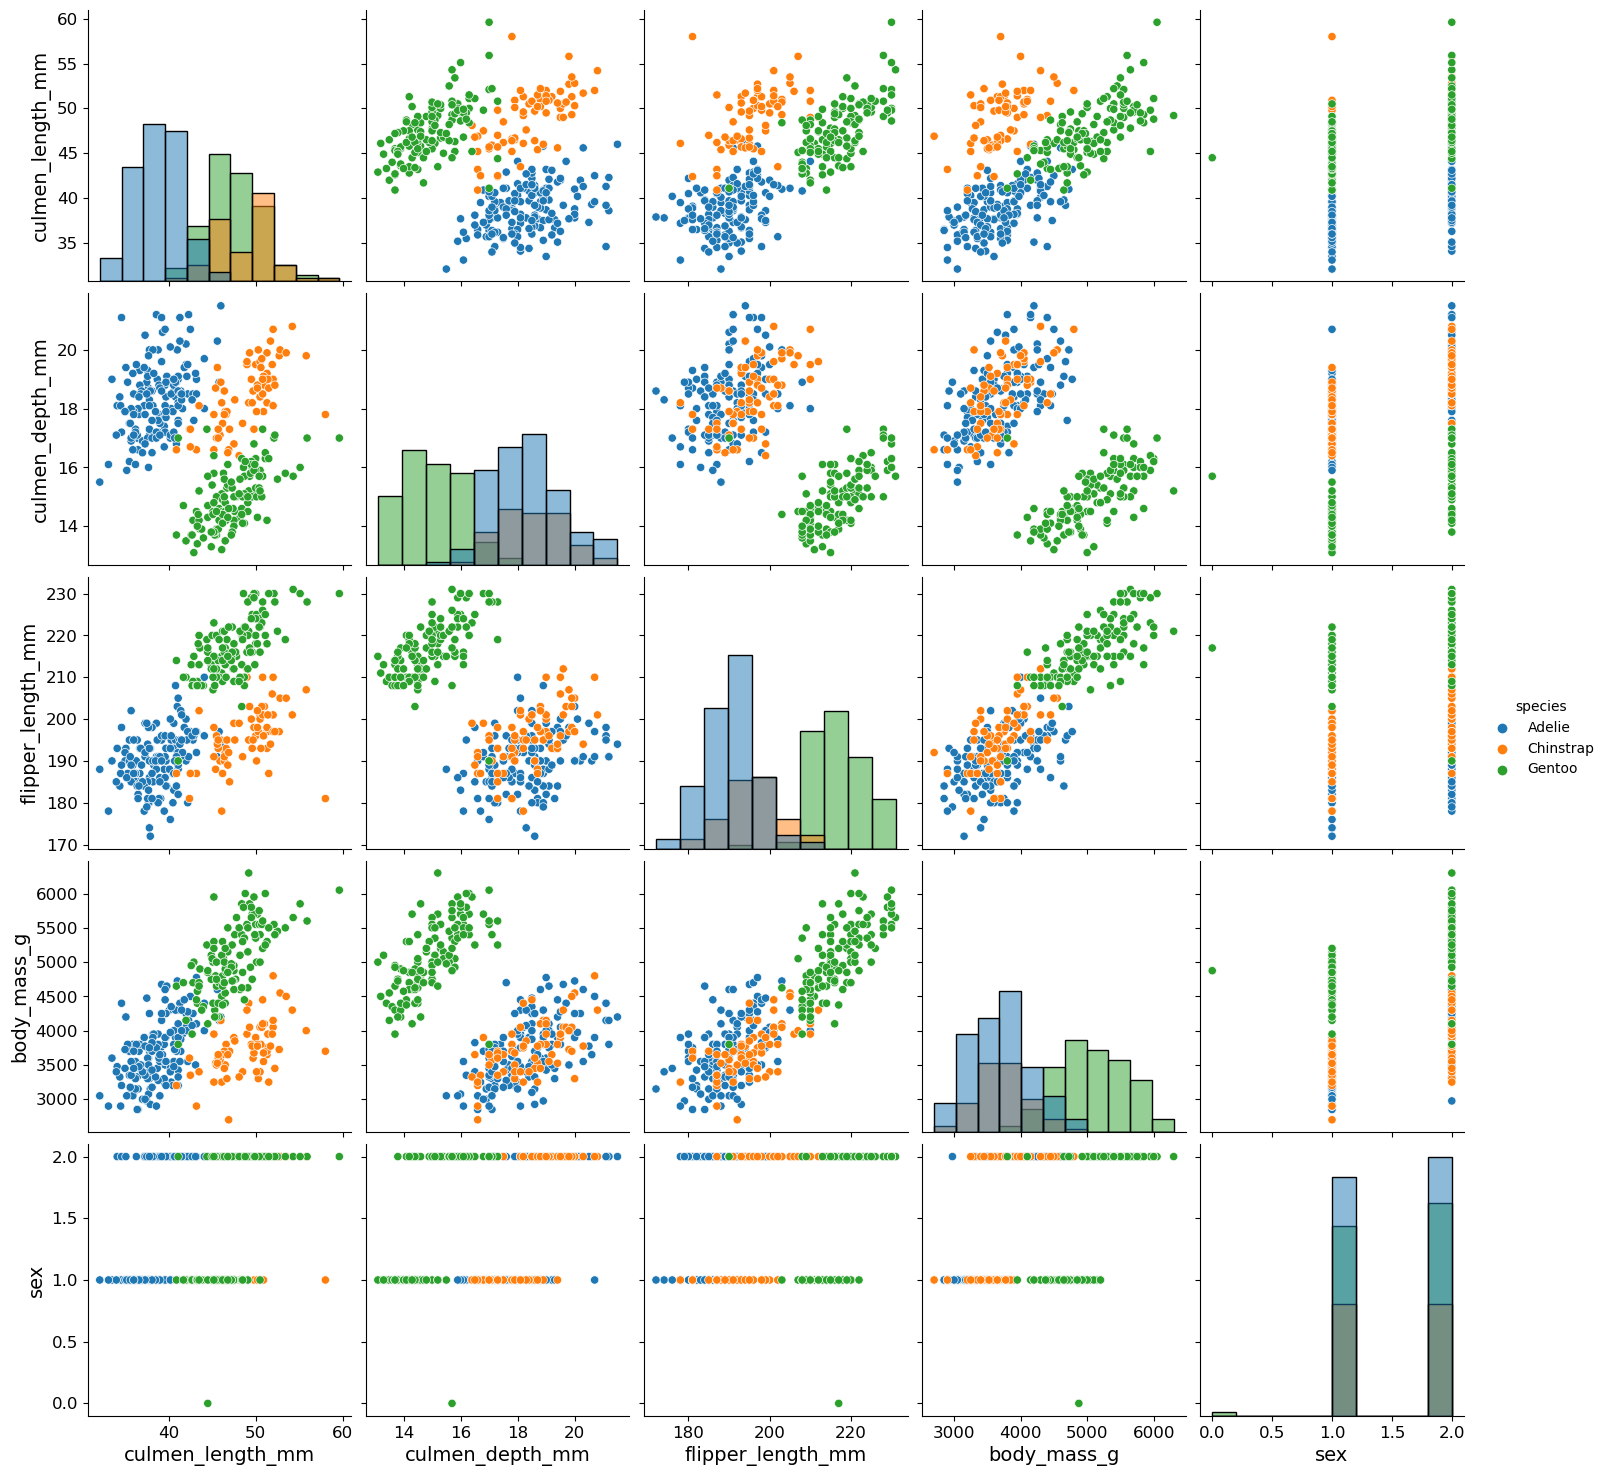

In [70]:
#Assigning binary classification for data
lb = LabelEncoder()
data["sex"] = lb.fit_transform(data["sex"])

sns.pairplot(data, hue="species", height=3,diag_kind="hist")


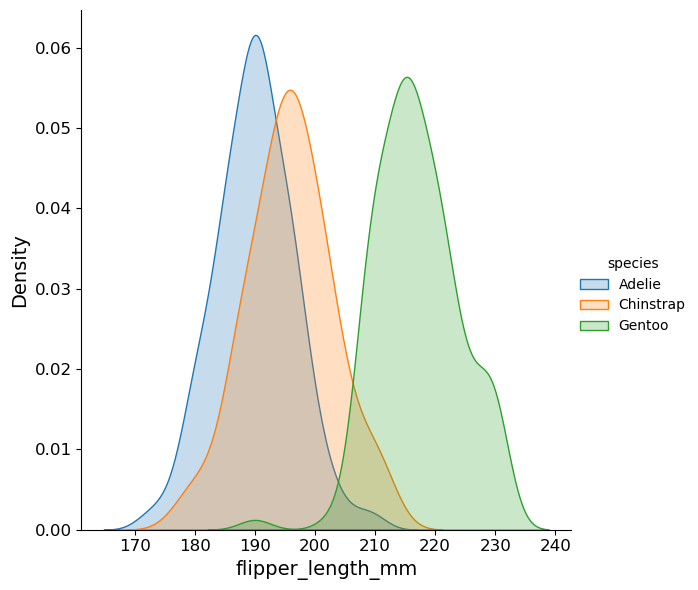

In [71]:
sns.FacetGrid(data, hue="species", height=6,) \
   .map(sns.kdeplot, "flipper_length_mm",fill=True) \
   .add_legend()

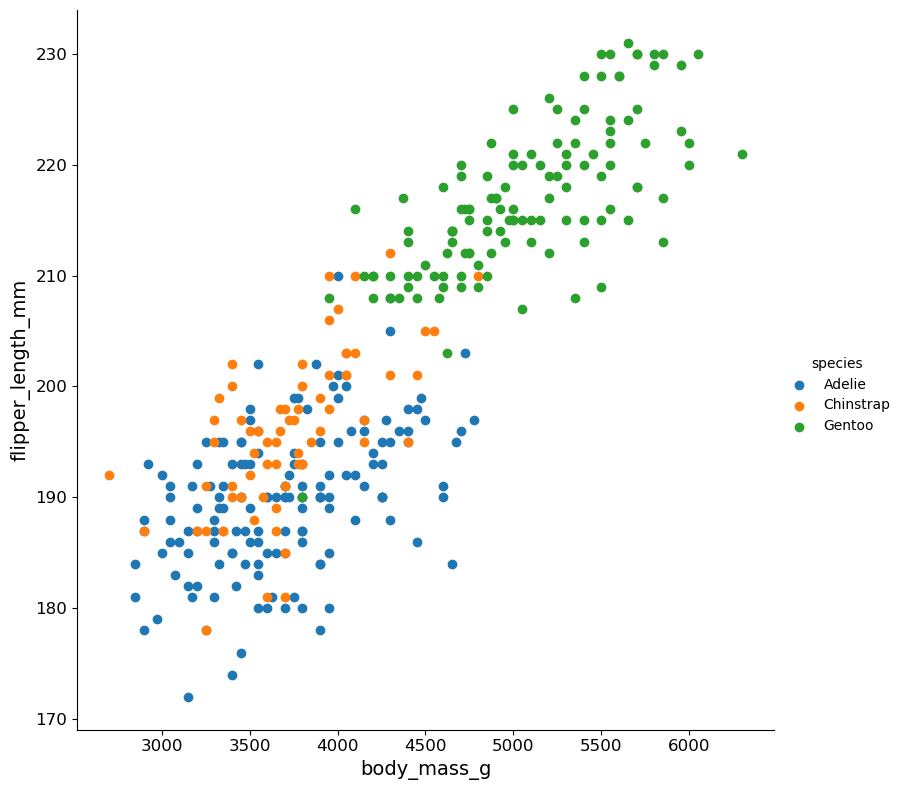

In [72]:
sns.FacetGrid(data, hue="species", height=8) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()

In [73]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [74]:
feature_cols = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g','sex']
X = data[feature_cols] # Features
y = data.species # Target variable


print(X.shape, y.shape)

(344, 5) (344,)


In [75]:


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
    
print(X_test)


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
306              43.4             14.4              218.0       4600.0    1
341              50.4             15.7              222.0       5750.0    2
291              46.4             15.6              221.0       5000.0    2
102              37.7             16.0              183.0       3075.0    1
289              50.7             15.0              223.0       5550.0    2
..                ...              ...                ...          ...  ...
206              42.5             17.3              187.0       3350.0    1
231              49.0             16.1              216.0       5550.0    2
330              50.5             15.2              216.0       5000.0    1
161              51.3             19.9              198.0       3700.0    2
39               39.8             19.1              184.0       4650.0    2

[104 rows x 5 columns]


Accuracy: 0.9807692307692307


[Text(0.6166666666666667, 0.9375, 'X[2] <= 206.0\ngini = 0.636\nsamples = 240\nvalue = [105, 47, 88]'),
 Text(0.43333333333333335, 0.8125, 'X[0] <= 43.35\ngini = 0.429\nsamples = 149\nvalue = [104, 43, 2]'),
 Text(0.26666666666666666, 0.6875, 'X[0] <= 42.35\ngini = 0.073\nsamples = 106\nvalue = [102, 3, 1]'),
 Text(0.13333333333333333, 0.5625, 'X[0] <= 40.8\ngini = 0.04\nsamples = 98\nvalue = [96, 1, 1]'),
 Text(0.06666666666666667, 0.4375, 'gini = 0.0\nsamples = 80\nvalue = [80, 0, 0]'),
 Text(0.2, 0.4375, 'X[1] <= 16.7\ngini = 0.204\nsamples = 18\nvalue = [16, 1, 1]'),
 Text(0.13333333333333333, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.26666666666666666, 0.3125, 'X[1] <= 17.25\ngini = 0.111\nsamples = 17\nvalue = [16, 0, 1]'),
 Text(0.2, 0.1875, 'X[2] <= 190.5\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.13333333333333333, 0.0625, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.26666666666666666, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0

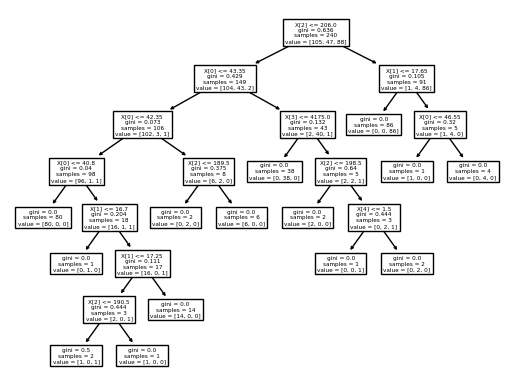

In [76]:
# Create Decision Tree classifer object
BinaryTree1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
BinaryTree1 = BinaryTree1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = BinaryTree1.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))


plot_tree(BinaryTree1)

Accuracy: 0.7788461538461539


[Text(0.5, 0.8333333333333334, 'X[3] <= 4287.5\nentropy = 1.513\nsamples = 240\nvalue = [105, 47, 88]'),
 Text(0.25, 0.5, 'X[3] <= 3787.5\nentropy = 1.09\nsamples = 143\nvalue = [94, 44, 5]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.929\nsamples = 90\nvalue = [59, 31, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.214\nsamples = 53\nvalue = [35, 13, 5]'),
 Text(0.75, 0.5, 'X[1] <= 17.45\nentropy = 0.704\nsamples = 97\nvalue = [11, 3, 83]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 83\nvalue = [0, 0, 83]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.75\nsamples = 14\nvalue = [11, 3, 0]')]

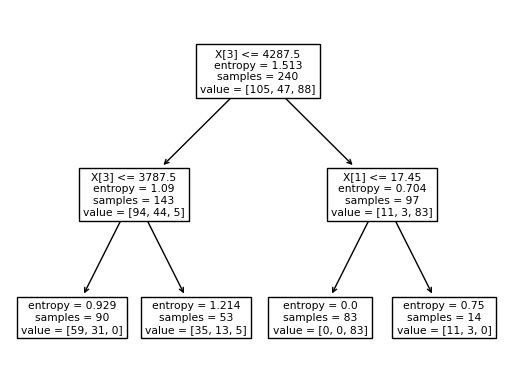

In [77]:
# Create Decision Tree classifer object
BinaryTree2 = DecisionTreeClassifier(criterion="entropy",random_state=30, max_depth=2,min_samples_leaf=1,max_features='sqrt')

# Train Decision Tree Classifer
BinaryTree2 = BinaryTree2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = BinaryTree2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

plot_tree(BinaryTree2)

Accuracy: 0.8173076923076923


[Text(0.5416666666666666, 0.875, 'X[3] <= 4287.5\ngini = 0.636\nsamples = 240\nvalue = [105, 47, 88]'),
 Text(0.3333333333333333, 0.625, 'X[3] <= 3187.5\ngini = 0.472\nsamples = 143\nvalue = [94, 44, 5]'),
 Text(0.16666666666666666, 0.375, 'X[2] <= 191.5\ngini = 0.1\nsamples = 19\nvalue = [18, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0]'),
 Text(0.25, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(0.5, 0.375, 'X[2] <= 195.5\ngini = 0.502\nsamples = 124\nvalue = [76, 43, 5]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.38\nsamples = 88\nvalue = [66, 21, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.537\nsamples = 36\nvalue = [10, 22, 4]'),
 Text(0.75, 0.625, 'X[1] <= 17.45\ngini = 0.254\nsamples = 97\nvalue = [11, 3, 83]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 83\nvalue = [0, 0, 83]'),
 Text(0.8333333333333334, 0.375, 'X[0] <= 46.55\ngini = 0.337\nsamples = 14\nvalue = [11, 3, 0]'),
 Text(0.75, 0.125, 'gin

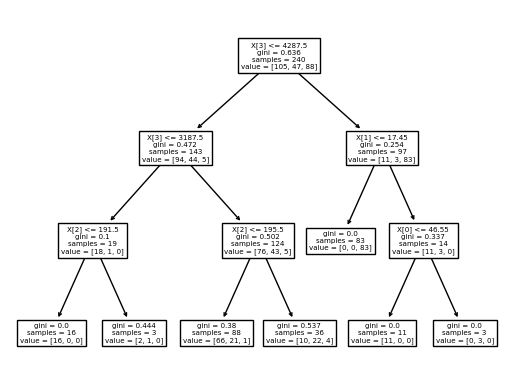

In [78]:
# Create Decision Tree classifer object
BinaryTree3 = DecisionTreeClassifier(criterion="gini",random_state=30, max_depth=3,min_samples_leaf=1, max_features='log2')

# Train Decision Tree Classifer
BinaryTree3 = BinaryTree3.fit(X_train,y_train)

#Predict the response for test dataset
y_pred3 = BinaryTree3.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

plot_tree(BinaryTree3)



In [79]:
# test classification dataset
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.982 (0.019)


In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred1)
report2 = classification_report(y_test, y_pred2)
report3 = classification_report(y_test, y_pred3)
print("Tree Type 1:")
print(report)  
print("Tree Type 2:")
print(report2)  
print("Tree Type 3:")
print(report3)  

Tree Type 1:
              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        47
   Chinstrap       0.95      0.95      0.95        21
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

Tree Type 2:
              precision    recall  f1-score   support

      Adelie       0.67      1.00      0.80        47
   Chinstrap       0.00      0.00      0.00        21
      Gentoo       1.00      0.94      0.97        36

    accuracy                           0.78       104
   macro avg       0.56      0.65      0.59       104
weighted avg       0.65      0.78      0.70       104

Tree Type 3:
              precision    recall  f1-score   support

      Adelie       0.80      0.85      0.82        47
   Chinstrap       0.55      0.52      0.54        21
      Gentoo       1.00      0.94   

c:\Users\mohaa\anaconda3\envs\meta\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\mohaa\anaconda3\envs\meta\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\mohaa\anaconda3\envs\meta\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [81]:
print("Accuracy for binary Tree With Dept 1:",metrics.accuracy_score(y_test, y_pred1))
print("Accuracy for binary Tree With Dept 2 using maxfreatures(Sqrt),randomstate:",metrics.accuracy_score(y_test, y_pred2))
print("Accuracy for binary Tree With Dept 3 using gini,randomstate:",metrics.accuracy_score(y_test, y_pred3))
print('Accuracy using 10 KFold Cross Manipulation: %.3f' % mean(scores))

Accuracy for binary Tree With Dept 1: 0.9807692307692307
Accuracy for binary Tree With Dept 2 using maxfreatures(Sqrt),randomstate: 0.7788461538461539
Accuracy for binary Tree With Dept 3 using gini,randomstate: 0.8173076923076923
Accuracy using 10 KFold Cross Manipulation: 0.982


Accuracy: 0.9583333333333334
Tree Swap Data:
              precision    recall  f1-score   support

      Adelie       0.94      0.99      0.96       105
   Chinstrap       0.95      0.87      0.91        47
      Gentoo       0.99      0.97      0.98        88

    accuracy                           0.96       240
   macro avg       0.96      0.94      0.95       240
weighted avg       0.96      0.96      0.96       240



[Text(0.5, 0.9166666666666666, 'X[2] <= 207.0\ngini = 0.635\nsamples = 104\nvalue = [47, 21, 36]'),
 Text(0.3, 0.75, 'X[0] <= 42.25\ngini = 0.422\nsamples = 66\nvalue = [46, 20, 0]'),
 Text(0.2, 0.5833333333333334, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.4, 0.5833333333333334, 'X[1] <= 20.1\ngini = 0.227\nsamples = 23\nvalue = [3, 20, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 46.2\ngini = 0.165\nsamples = 22\nvalue = [2, 20, 0]'),
 Text(0.2, 0.25, 'X[4] <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5, 0]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.7, 0.75, 'X[1] <= 18.1\ngini = 0.101\nsamples = 38\nvalue = [1, 1, 36]'),
 Text(0.6, 0.5833333333333334, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]'),
 

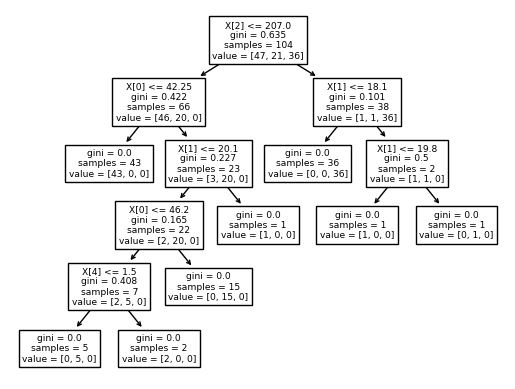

In [82]:
#testing with train and test swapping

# Create Decision Tree classifer object
BinaryTreeSwap = DecisionTreeClassifier()

# Train Decision Tree Classifer
BinaryTreeSwap = BinaryTreeSwap.fit(X_test,y_test)

#Predict the response for test dataset
y_predSwaped = BinaryTreeSwap.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_predSwaped))


reportSwap = classification_report(y_train, y_predSwaped)
print("Tree Swap Data:")
print(reportSwap)  

plot_tree(BinaryTreeSwap)



Accuracy: 0.9602272727272727


[Text(0.5, 0.9166666666666666, 'X[0] <= 43.25\ngini = 0.627\nsamples = 168\nvalue = [76, 30, 62]'),
 Text(0.2777777777777778, 0.75, 'X[2] <= 208.5\ngini = 0.099\nsamples = 78\nvalue = [74, 2, 2]'),
 Text(0.2222222222222222, 0.5833333333333334, 'X[1] <= 16.75\ngini = 0.076\nsamples = 77\nvalue = [74, 2, 1]'),
 Text(0.1111111111111111, 0.4166666666666667, 'X[0] <= 40.2\ngini = 0.408\nsamples = 7\nvalue = [5, 2, 0]'),
 Text(0.05555555555555555, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.16666666666666666, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[1] <= 17.05\ngini = 0.028\nsamples = 70\nvalue = [69, 0, 1]'),
 Text(0.2777777777777778, 0.25, 'X[0] <= 41.0\ngini = 0.219\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.3888888888888889, 

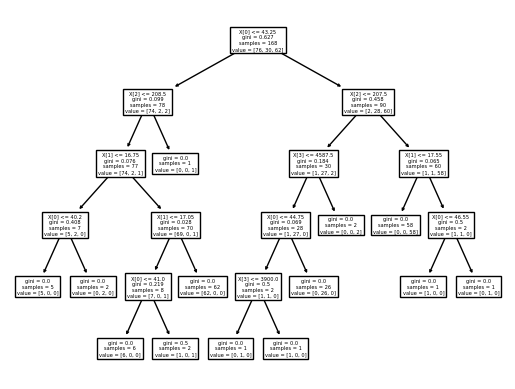

In [83]:
#testing with by moving 30% of training set to testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.51, random_state=1) # 49% training and 51% test

# Create Decision Tree classifer object
BinaryTree30 = DecisionTreeClassifier()

# Train Decision Tree Classifer
BinaryTree30 = BinaryTree30.fit(X_train,y_train)

#Predict the response for test dataset
y_pred30 = BinaryTree30.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred30))


plot_tree(BinaryTree30)



Accuracy: 0.8951612903225806


[Text(0.4583333333333333, 0.9, 'X[0] <= 43.35\ngini = 0.617\nsamples = 96\nvalue = [44, 15, 37]'),
 Text(0.25, 0.7, 'X[1] <= 17.05\ngini = 0.045\nsamples = 43\nvalue = [42, 0, 1]'),
 Text(0.16666666666666666, 0.5, 'X[0] <= 41.0\ngini = 0.245\nsamples = 7\nvalue = [6, 0, 1]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.25, 0.3, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'X[3] <= 4125.0\ngini = 0.457\nsamples = 53\nvalue = [2, 15, 36]'),
 Text(0.5, 0.5, 'X[2] <= 208.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8333333333333334, 0.5, 'X[2] <= 202.0\ngini = 0.101\nsamples = 38\nvalue = [1, 1, 36]'),
 Text(0.75, 0.3, 'X[3] <= 4350.0\ngini = 0.5\nsamples = 2\nvalue

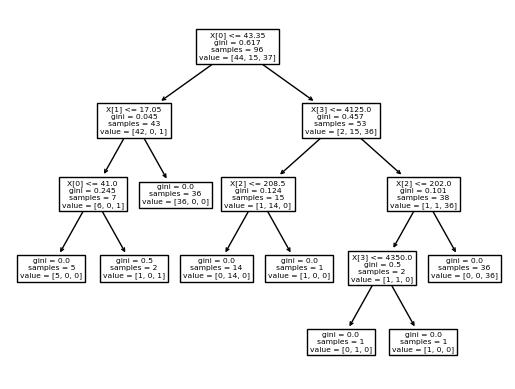

In [84]:
#testing with by moving 60% of training set to testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.72, random_state=1) # 28% training and 72% test

# Create Decision Tree classifer object
BinaryTree60 = DecisionTreeClassifier()

# Train Decision Tree Classifer
BinaryTree60 = BinaryTree60.fit(X_train,y_train)

#Predict the response for test dataset
y_pred60 = BinaryTree60.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred60))


plot_tree(BinaryTree60)


In [85]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.51, random_state=1) # 49% training and 51% test

# Create Decision Tree classifer object
RandomTree30 = RandomForestClassifier()

# Train Decision Tree Classifer
RandomTree30 = RandomTree30.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = RandomTree30.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))



Accuracy: 0.9715909090909091


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.72, random_state=1) # 28% training and 572% test

# Create Decision Tree classifer object
RandomTree30 = RandomForestClassifier()

# Train Decision Tree Classifer
RandomTree30 = RandomTree30.fit(X_train,y_train)
#Predict the response for test dataset
y_pred1 = RandomTree30.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

96        Adelie
210    Chinstrap
240       Gentoo
57        Adelie
296       Gentoo
         ...    
203    Chinstrap
255       Gentoo
72        Adelie
235       Gentoo
37        Adelie
Name: species, Length: 96, dtype: object
Accuracy: 0.9637096774193549


In [93]:
#Linear Regression
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train=X_train.values.tolist()
X_test=X_test.values.tolist()
y_train=y_train.values.tolist()
y_test=y_test.values.tolist()
x=np.array([[1,2],[3,4]])
s=np.array([[4,3],[2,1]])
print(len(X_train))
print(y_train)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y)

240
['Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'A

ValueError: could not convert string to float: 'Gentoo'